In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Deep learning/33.Biomedical_Engineering/2.Models
!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Deep learning/33.Biomedical_Engineering/2.Models
'2024.05.09. BioMedical_Engineering.ipynb'			   best_model.pth
'2024.05.10. BioMedical_Engineering Binary classification.ipynb'   BioMedical_Engineering.ipynb


# Data Engineering

In [3]:
!pwd

/content/gdrive/MyDrive/Deep learning/33.Biomedical_Engineering/2.Models


## Load data and remove ```nan``` dataset

In [39]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the file with automatic data type inference
file_path = "../1.Data/2024.05.08_Hanh.xlsx"
# file_path = "../1.Data/Khai_20-05-2024_TextNorm.xlsx"
data = pd.read_excel(file_path, dtype=None)

# Define numerical features
numerical_features = ['Kv100', 'M', 'δ', 'T', 'A365', 'A460', 'Anadn', 'POM', 'Ae', 'An', 'Am', 'Ar', 'Ac',
                      'F_Ae', 'F_An', 'F_Am', 'F_Ar', 'F_Ac', 'Typer of skins', 'Age', 'Weight', 'Height', 'BMI_index',
                      'Number of cigarettes per week if smoked:', 'Level of BP', 'Heart Rate',
                      'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing']



# Convert numerical features to numeric type
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors='coerce')

# Select columns with object or categorical dtype
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()


print('Number of samaples before dropping Nan', data.shape)

data.dropna(inplace=True)
print('Number of samaples after dropping Nan', data.shape)

# # Check data types and non-null values
print(data.info())

# # # Check summary statistics of numeric columns
# print(data.describe())

Number of samaples before dropping Nan (962, 42)
Number of samaples after dropping Nan (789, 42)
<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 0 to 960
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type of data                              789 non-null    object 
 1   1. Volunteer full name                    789 non-null    object 
 2   Kv100                                     789 non-null    float64
 3   M                                         789 non-null    float64
 4   δ                                         789 non-null    float64
 5   T                                         789 non-null    float64
 6   A365                                      789 non-null    float64
 7   A460                                      789 non-null    float64
 8   Anadn                                     789 non-null    float64
 9   POM              

In [40]:
print('Number of numerical features: ', len(numerical_features) ,'\nNumber of categorical features: ', len(categorical_features))

Number of numerical features:  31 
Number of categorical features:  11


## Drop unneccesary column

Drop out volunteer and blood presure type

In [41]:
# column_to_drop = ['1. Volunteer full name', 'Blood Pressure', 'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing'] #
# data = data.drop(column_to_drop, axis=1)


In [42]:
print(data.shape)

(789, 42)


## Checking dataset and categories in each feature

In [43]:
# Separate columns by data type
float_columns_after_dropped = data.select_dtypes(include=['float']).columns
int_columns_after_dropped = data.select_dtypes(include=['int']).columns
object_columns_after_dropped = data.select_dtypes(include=['object']).columns

# Print the columns by data type
print("Float Columns:")
print(float_columns_after_dropped)
print("\nInt Columns:")
print(int_columns_after_dropped)
print("\nObject Columns:")
print(object_columns_after_dropped)

Float Columns:
Index(['Kv100', 'M', 'δ', 'T', 'A365', 'A460', 'Anadn', 'POM', 'Ae', 'An',
       'Am', 'Ar', 'Ac', 'F_Ae', 'F_An', 'F_Am', 'F_Ar', 'F_Ac', 'Weight',
       'Height', 'BMI_index', 'Number of cigarettes per week if smoked:',
       'Heart Rate'],
      dtype='object')

Int Columns:
Index(['Typer of skins', 'Age', 'Level of BP', 'Stress', 'Anxiety',
       'Depression', 'Hypertension', 'Non-wellbeing'],
      dtype='object')

Object Columns:
Index(['Type of data', '1. Volunteer full name', 'Ethnicity', 'Left or Right',
       'Sleep', 'Gender', 'Race', 'Smoking ', 'N', 'Blood Pressure',
       'DASS_21'],
      dtype='object')


In [44]:
# # for feature in object_columns_after_dropped:
# for feature in data.columns:
#     if data[feature].dtype == 'object':  # Check if the feature is categorical

#       unique_categories = data[feature].unique()
#       print(f"\nUnique categories in the feature of {feature}:")
#       for category in unique_categories:
#           print(category)

## Visualization of categorical feature distribution

In [45]:

# # Iterate through each feature and plot its distribution as a pie chart
# for column in data.columns:
#     if data[column].dtype == 'object':  # Check if the feature is categorical
#         # Get the counts of each attribute in the feature
#         feature_counts = data[column].value_counts()

#         # Plot the distribution of attributes in the feature as a pie chart
#         plt.figure(figsize=(8, 8))
#         plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
#         plt.title(f'Distribution of Attributes in {column}')
#         plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#         plt.show()


## Visualization of numerical feature distribution

In [46]:

# # Iterate through each feature and plot its distribution as a pie chart
# for col in data.columns:
#     if data[col].dtype in ['float', 'int']:  # Check if the feature is numerical
#         # print(col)

#       # Visualize the distribution of numeric columns using box plots
#       plt.figure(figsize=(8, 6))
#       sns.boxplot(x=data[col])
#       plt.title(f'Boxplot of {col}')
#       plt.show()

In [47]:
data.head()

,Type of data,1. Volunteer full name,Kv100,M,δ,T,A365,A460,Anadn,POM,...,N,Blood Pressure,Level of BP,Heart Rate,DASS_21,Stress,Anxiety,Depression,Hypertension,Non-wellbeing
0,Original,Minh Ngoc Nguyen,12.90,22.50,2.90,32.01,114.0,62.0,0.54,5.68,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
1,Original,Minh Ngoc Nguyen,22.28,22.55,5.02,32.14,122.0,42.0,0.34,10.38,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
2,Filter,Minh Ngoc Nguyen,11.10,22.85,2.54,32.04,114.0,62.0,0.54,7.54,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
3,Filter,Minh Ngoc Nguyen,20.78,23.01,4.78,23.01,122.0,41.0,0.33,11.31,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,95.0,NoRMAL,0,0,0,0,0
4,Original,Hong Pham,20.76,4.39,0.91,24.44,132.0,93.0,0.70,0.91,...,Migraine,NoRMAL: SYSTOLIC mm Hg (upper number) LESS THA...,0,70.0,NoRMAL,0,0,0,0,0


## Removing Outliers

In [48]:
# # Define a function to remove outliers using IQR method
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df_filtered

# # Remove outliers from numeric columns using IQR method

# outliers_based = ['Kv100', 'M', 'δ', 'T', 'A365', 'A460', 'Anadn', 'POM', 'Ae', 'An',
#        'Am', 'Ar', 'Ac', 'F_Ae', 'F_An', 'F_Am', 'F_Ar', 'F_Ac']
# for col in outliers_based:
#   data = remove_outliers_iqr(data, col)

# # Check the shape of the dataframe after removing outliers
# print(data.shape)


## Encoding categorical features

In [49]:
# Encode categorical variables and store the mapping

label_encoder = LabelEncoder()
encoded_values = {}
for column in data.columns:
    if data[column].dtype == 'object' and column != '1. Volunteer full name':
        data[column] = label_encoder.fit_transform(data[column])
        encoded_values[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

        print(f'Feature: {column} \n', encoded_values[f'{column}'])



Feature: Type of data 
 {'Filter': 0, 'Fragment 1': 1, 'Fragment 2': 2, 'Original': 3}
Feature: Ethnicity 
 {'Bahrain': 0, 'Brazil': 1, 'British': 2, 'China': 3, 'India': 4, 'Indonesia': 5, 'Iran': 6, 'Iraq': 7, 'Jamaica': 8, 'Kenya': 9, 'Kjastan': 10, 'Malaysia': 11, 'Mexico': 12, 'Nigeria': 13, 'Pakistan': 14, 'Russia': 15, 'Spain': 16, 'Vietnam': 17}
Feature: Left or Right 
 {'Left': 0, 'Right': 1}
Feature: Sleep 
 {'No': 0, 'Yes': 1}
Feature: Gender 
 {'Female': 0, 'Male': 1}
Feature: Race 
 {'Asian or Asian British': 0, 'Black, African, Caribbean or Black Bristish': 1, 'White': 2}
Feature: Smoking  
 {'Cigarettes, pipe tobacco...': 0, 'Do Not smoke': 1, 'ex smoke': 2}
Feature: N 
 {'Anemia': 0, 'Diabetes Hypertension': 1, 'Hepatitis B': 2, 'Hypertension': 3, 'Hypertension Hepatitis B': 4, 'Hypertension Migraine': 5, 'Hypertension Migraine Hepatitis B': 6, 'Migraine': 7, 'No': 8, 'Post Brian Sugery': 9, 'Post sroke': 10, 'Pregnant': 11}
Feature: Blood Pressure 
 {'ELEVATED: SYSTOLI

In [50]:
# output labels
label_names = list(encoded_values['DASS_21'].keys())
label_names

['ANXIETY',
 'DEPRESSION',
 'NoRMAL',
 'STRESS',
 'STRESS ANXIETY',
 'STRESS ANXIETY DEPRESSION']

In [51]:
data.head()

,Type of data,1. Volunteer full name,Kv100,M,δ,T,A365,A460,Anadn,POM,...,N,Blood Pressure,Level of BP,Heart Rate,DASS_21,Stress,Anxiety,Depression,Hypertension,Non-wellbeing
0,3,Minh Ngoc Nguyen,12.90,22.50,2.90,32.01,114.0,62.0,0.54,5.68,...,7,4,0,95.0,2,0,0,0,0,0
1,3,Minh Ngoc Nguyen,22.28,22.55,5.02,32.14,122.0,42.0,0.34,10.38,...,7,4,0,95.0,2,0,0,0,0,0
2,0,Minh Ngoc Nguyen,11.10,22.85,2.54,32.04,114.0,62.0,0.54,7.54,...,7,4,0,95.0,2,0,0,0,0,0
3,0,Minh Ngoc Nguyen,20.78,23.01,4.78,23.01,122.0,41.0,0.33,11.31,...,7,4,0,95.0,2,0,0,0,0,0
4,3,Hong Pham,20.76,4.39,0.91,24.44,132.0,93.0,0.70,0.91,...,7,4,0,70.0,2,0,0,0,0,0


# Separation and training methods

- 1. Identify unique names of volunteer
- 2. Separate data based on the unique names (patient)
- 3. When we have training and testing data, remove ['1. Volunteer full name', 'Blood Pressure', 'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing']
- 4. Split train and test data into features and target
- 5. Normalize input features


In [52]:
from sklearn.model_selection import train_test_split

# Identify unique patients
unique_patients = data['1. Volunteer full name'].unique()

# Split patients into train and test sets
train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=123)

# print(len(unique_patients), len(train_patients), len(test_patients))

# Filter data for train and test sets
train_data = data[data['1. Volunteer full name'].isin(train_patients)]
test_data = data[data['1. Volunteer full name'].isin(test_patients)]





In [53]:
train_data.head()

,Type of data,1. Volunteer full name,Kv100,M,δ,T,A365,A460,Anadn,POM,...,N,Blood Pressure,Level of BP,Heart Rate,DASS_21,Stress,Anxiety,Depression,Hypertension,Non-wellbeing
4,3,Hong Pham,20.76,4.39,0.91,24.44,132.0,93.0,0.70,0.91,...,7,4,0,70.0,2,0,0,0,0,0
5,3,Hong Pham,41.92,2.87,2.04,24.60,117.0,76.0,0.65,1.00,...,7,4,0,70.0,2,0,0,0,0,0
6,3,Hong Pham,29.48,20.55,6.06,30.52,119.0,123.0,1.03,4.84,...,8,4,0,70.0,2,0,0,0,0,0
7,3,Hong Pham,8.63,25.94,2.24,32.48,105.0,56.0,0.53,10.29,...,8,4,0,70.0,2,0,0,0,0,0
8,0,Hong Pham,19.51,23.05,4.50,30.56,119.0,124.0,1.04,5.43,...,8,4,0,70.0,2,0,0,0,0,0


In [54]:
column_to_drop = ['1. Volunteer full name', 'Blood Pressure', 'Stress', 'Anxiety', 'Depression', 'Hypertension', 'Non-wellbeing'] #
train_data = train_data.drop(column_to_drop, axis=1)
test_data = test_data.drop(column_to_drop, axis=1)

In [55]:


# Split train and test data into features and target
X_train = train_data.drop('DASS_21', axis=1)
y_train = train_data['DASS_21']
X_test = test_data.drop('DASS_21', axis=1)
y_test = test_data['DASS_21']

# Normalize input features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)


In [56]:
class_distribution = data['DASS_21'].value_counts()
print('Total class distribution: ', class_distribution)
class_distribution = y_train.value_counts()
print('\nTrain class distribution: ',class_distribution)
class_distribution = y_test.value_counts()
print('\nTest class distribution: ', class_distribution)

print(label_names)

Total class distribution:  DASS_21
2    598
5    104
0     28
3     26
4     24
1      9
Name: count, dtype: int64

Train class distribution:  DASS_21
2    492
5     93
3     26
4     24
0     20
1      9
Name: count, dtype: int64

Test class distribution:  DASS_21
2    106
5     11
0      8
Name: count, dtype: int64
['ANXIETY', 'DEPRESSION', 'NoRMAL', 'STRESS', 'STRESS ANXIETY', 'STRESS ANXIETY DEPRESSION']


## RandomForestClassifier Binary Classification

In [57]:
# Define a function to map encoded labels to 'NORMAL' and 'UNNORMAL'
def map_encoded_labels(label):
    if label in [0, 1, 3, 4, 5]:  # These are the encoded labels corresponding to 'ANXIETY', 'DEPRESSION', 'STRESS', 'STRESS ANXIETY', 'STRESS ANXIETY DEPRESSION'
        return 1  # 'UNNORMAL'
    else:
        return 0  # 'NORMAL'
new_labels = ['Normal', 'Disease']
# Apply the mapping function to the encoded labels
y_train_binary = y_train.apply(map_encoded_labels)
y_test_binary = y_test.apply(map_encoded_labels)


# Print unique labels after mapping
print("Unique labels in y_train_mapped:", y_train_binary.unique())
print("Unique labels in y_test_mapped:", y_test_binary.unique())


Unique labels in y_train_mapped: [0 1]
Unique labels in y_test_mapped: [0 1]


DASS_21
0    492
1    492
Name: count, dtype: int64
Accuracy: 0.832
ROC AUC: 0.5484111221449851
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       123
           1       0.00      0.00      0.00         2

    accuracy                           0.83       125
   macro avg       0.49      0.42      0.45       125
weighted avg       0.97      0.83      0.89       125



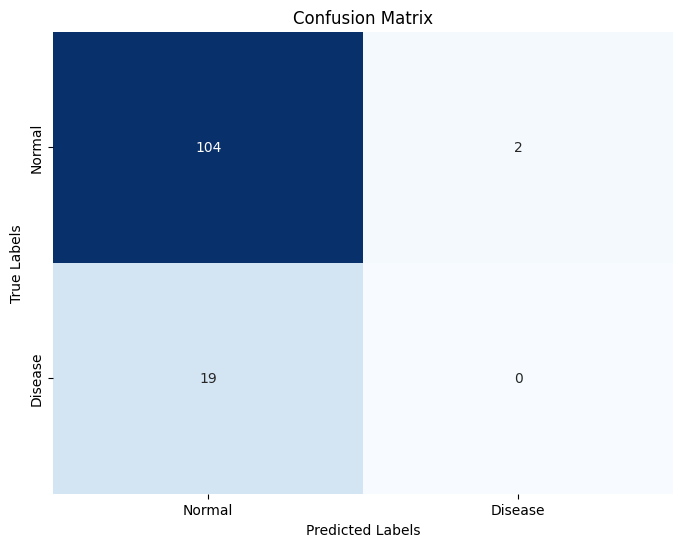

In [58]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_binary)

# Check the new class distribution
print(y_train_balanced.value_counts())



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Initialize RandomForestClassifier
rf_classifierAS = RandomForestClassifier(random_state=42)

# Train the model
# rf_classifierAS.fit(X_train_balanced, y_train_balanced)
rf_classifierAS.fit(X_train, y_train_binary)
# Predict on the test set
y_pred = rf_classifierAS.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC
y_pred_proba = rf_classifierAS.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
print("ROC AUC:", roc_auc)

# Classification Report
print(classification_report(y_pred, y_test_binary))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=new_labels, yticklabels=new_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Get important features

In [59]:
# Get feature importances
feature_importances_rf = rf_classifierAS.feature_importances_

# Create a DataFrame to display feature importances
importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

print(importance_df_rf)

# # Print the top n important features
# n = 25  # Number of top important features to display
# print(f"Top {n} important features using RandomForestClassifier:")
# print(importance_df_rf.head(n))


                                     Feature  Importance
28                                 BMI_index    0.111434
26                                    Weight    0.091017
19                                 Ethnicity    0.072111
25                                       Age    0.067337
27                                    Height    0.066651
33                                Heart Rate    0.063523
31                                         N    0.050563
22                                    Gender    0.046823
4                                          T    0.046822
5                                       A365    0.039780
2                                          M    0.039075
24                            Typer of skins    0.024543
7                                      Anadn    0.022628
1                                      Kv100    0.022145
13                                        Ac    0.021901
6                                       A460    0.021308
3                              

## Using important features for training

Accuracy (Top 10 features): 0.84
ROC AUC (Top 10 features): 0.5786991062562066
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       124
           1       0.00      0.00      0.00         1

    accuracy                           0.84       125
   macro avg       0.50      0.42      0.46       125
weighted avg       0.98      0.84      0.91       125



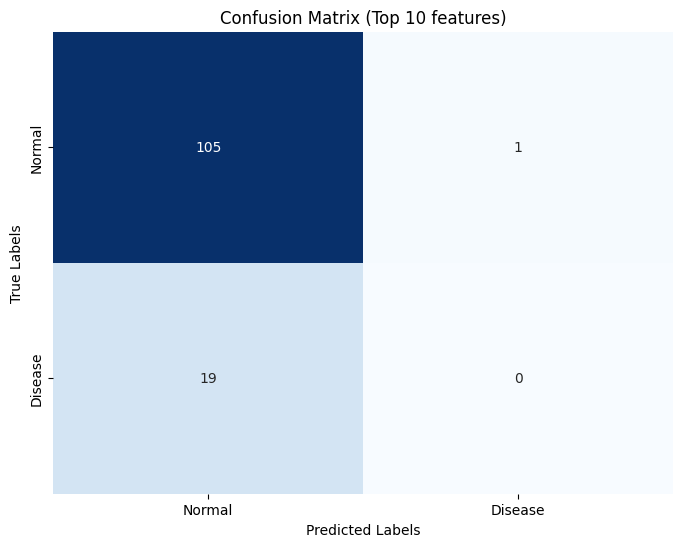

In [60]:
from sklearn.metrics import classification_report
# Get indices of top 10 features
top_10_indices = feature_importances_rf.argsort()[-15:][::-1]

# Get names of top 10 features
top_10_features = X_train.columns[top_10_indices]

# Filter training and testing data to include only top 10 features
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

# Initialize and train the new RandomForestClassifier model
rf_classifier_top_10 = RandomForestClassifier(random_state=42)
rf_classifier_top_10.fit(X_train_top_10, y_train_binary)

# Predict on the test set
y_pred_top_10 = rf_classifier_top_10.predict(X_test_top_10)

# Calculate accuracy
accuracy_top_10 = accuracy_score(y_test_binary, y_pred_top_10)
print("Accuracy (Top 10 features):", accuracy_top_10)

# Calculate ROC AUC
y_pred_proba_top_10 = rf_classifier_top_10.predict_proba(X_test_top_10)[:, 1]
roc_auc_top_10 = roc_auc_score(y_test_binary, y_pred_proba_top_10)
print("ROC AUC (Top 10 features):", roc_auc_top_10)

# Classification Report
print(classification_report(y_pred_top_10, y_test_binary))

# Calculate confusion matrix
conf_matrix_top_10 = confusion_matrix(y_test_binary, y_pred_top_10)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_top_10, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=new_labels, yticklabels=new_labels)
plt.title('Confusion Matrix (Top 10 features)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [61]:
!pip install shap==0.44.0

In [73]:
X_test_top_10


,BMI_index,Weight,Ethnicity,Age,Height,Heart Rate,N,Gender,T,A365,M,Typer of skins,Anadn,Kv100,Ac
0,21.777778,49.0,17,37,150.0,95.0,7,0,32.01,114.0,22.50,3,0.54,12.90,0.76
1,21.777778,49.0,17,37,150.0,95.0,7,0,32.14,122.0,22.55,3,0.34,22.28,0.78
2,21.777778,49.0,17,37,150.0,95.0,7,0,32.04,114.0,22.85,3,0.54,11.10,0.76
3,21.777778,49.0,17,37,150.0,95.0,7,0,23.01,122.0,23.01,3,0.33,20.78,0.73
34,27.996728,75.3,11,33,164.0,70.0,11,0,32.15,50.0,25.47,3,2.24,10.96,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,26.769780,72.0,17,43,164.0,70.0,2,1,35.17,80.0,35.08,3,0.59,7.63,0.97
902,26.769780,72.0,17,43,164.0,70.0,2,1,34.48,72.0,35.02,3,0.84,5.90,0.77
903,26.769780,72.0,17,43,164.0,70.0,2,1,34.83,69.0,28.87,3,1.12,7.53,0.66
910,25.476660,62.0,17,50,156.0,70.0,3,0,33.84,9.0,29.81,3,5.30,9.31,0.96


In [62]:


import shap
shap.initjs()
explainer_ML = shap.Explainer(rf_classifier_top_10)
shap_values_ML = explainer_ML.shap_values(X_test_top_10)

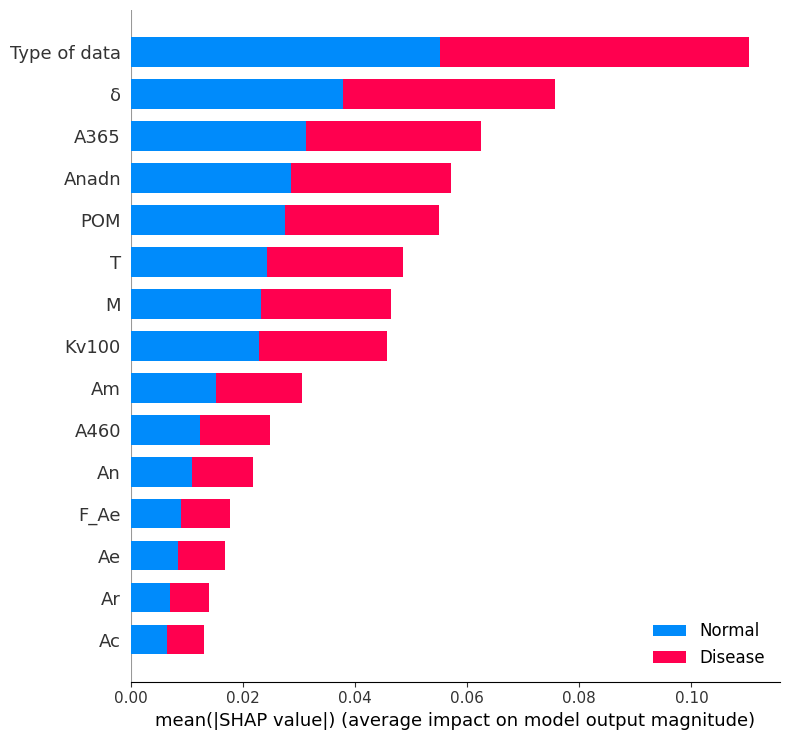

In [63]:
shap.summary_plot(shap_values_ML, X_test_top_10, plot_type="bar", class_names= new_labels, feature_names = X_test.columns)

## Model Analysis

- Contribution of each attribute to a prediction

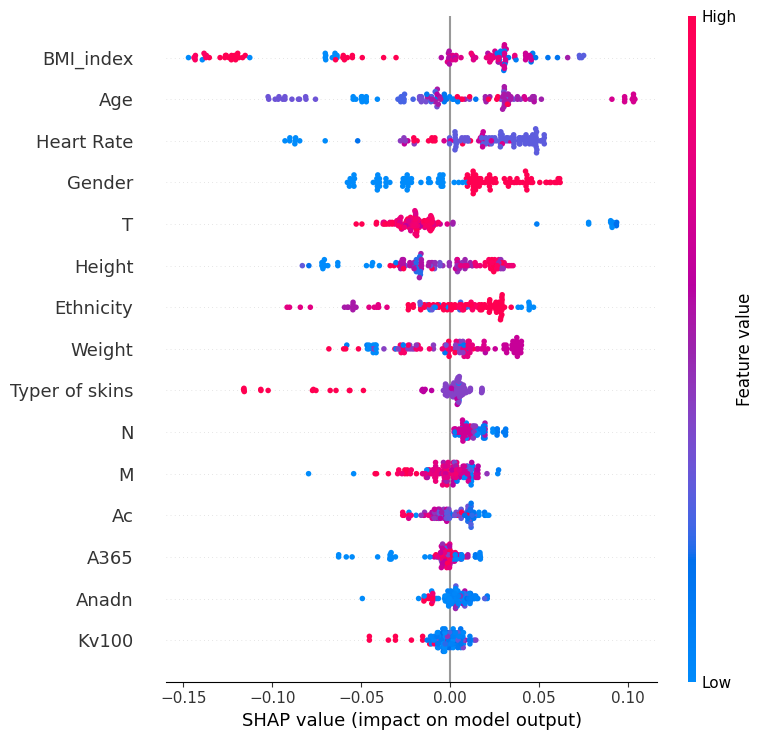

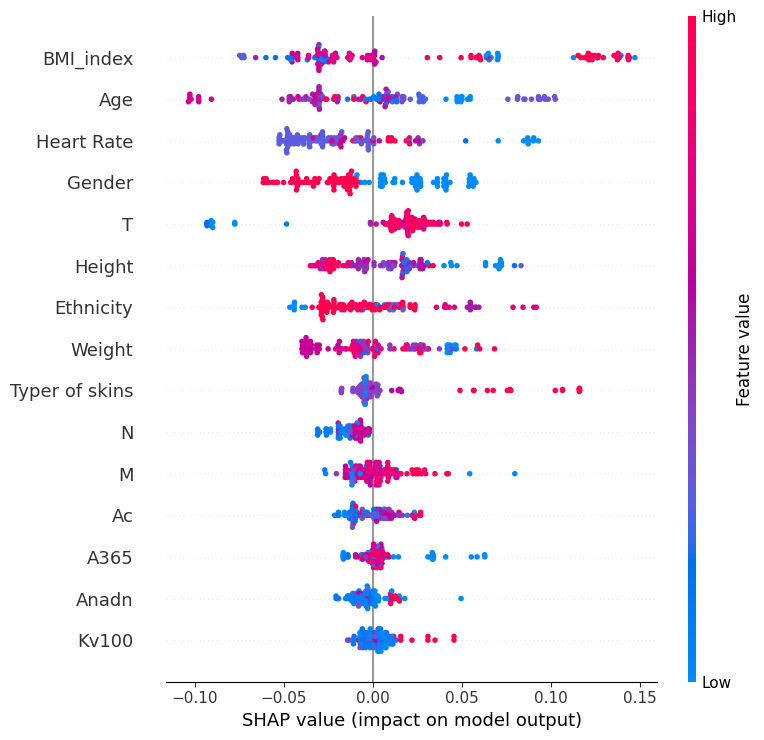

In [64]:
shap.summary_plot(shap_values_ML[0], X_test_top_10, class_names=new_labels, feature_names=X_test_top_10.columns) # 0 is the normal
shap.summary_plot(shap_values_ML[1], X_test_top_10, class_names=new_labels, feature_names=X_test_top_10.columns) # 1 is the disease


## Analysis of an instance
- given a sample, the model will predict that instance will be normal or diseased

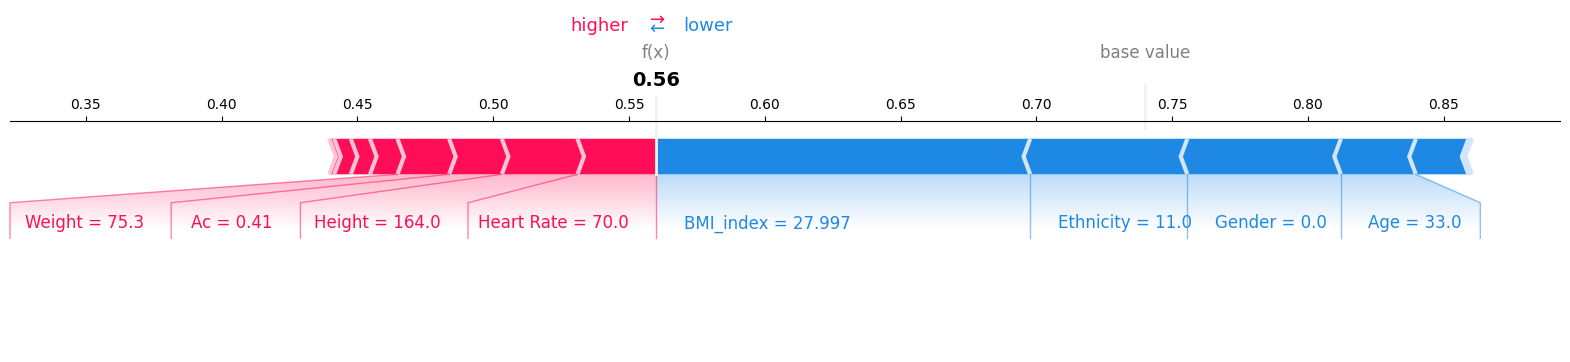

In [65]:
# Replace index with the desired index of the instance in the test set
class_for_test = 0 # normal
index = 9
shap.force_plot(explainer_ML.expected_value[class_for_test], shap_values_ML[class_for_test][index], np.round(X_test_top_10.iloc[index], 3), feature_names=X_test_top_10.columns, matplotlib=True)


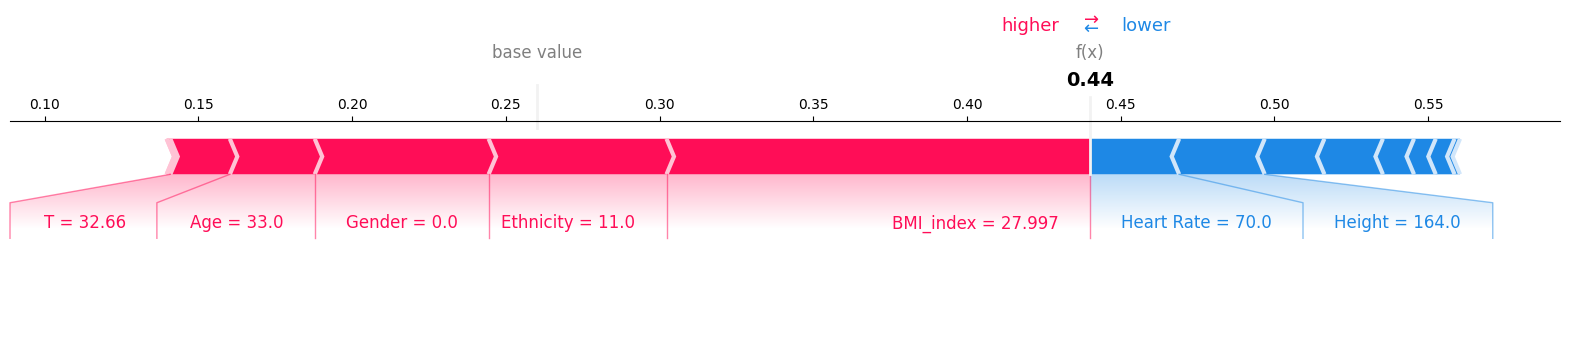

In [66]:
# Replace index with the desired index of the instance in the test set
class_for_test = 1 # disease
index = 9
shap.force_plot(explainer_ML.expected_value[class_for_test], shap_values_ML[class_for_test][index], np.round(X_test_top_10.iloc[index], 3), feature_names=X_test_top_10.columns, matplotlib=True)


# Deep learning

In [67]:
# Normalize input features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_top_10)
X_test_normalized = scaler.transform(X_test_top_10)


# Convert Pandas Series to NumPy array
y_train_array = y_train_binary.values
y_test_array = y_test_binary.values

# Convert NumPy arrays to PyTorch tensors
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler


# Define the MLP architecture for binary classification
class MLPBinary(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob):
        super(MLPBinary, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        # out = self.dropout(out)
        # out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out


# Define hyperparameters
input_size = X_train_normalized.shape[1]
hidden_size = 64
num_epochs = 20
batch_size = 32
dropout_prob = 0.5
learning_rate = 0.001

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = MLPBinary(input_size, hidden_size, dropout_prob)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define variables to track the best model and its accuracy
best_accuracy = 0
best_model = None

# Training the model
for epoch in range(num_epochs):
    # Train
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Evaluate on train set
        train_outputs = model(X_train_tensor)
        train_predicted = (train_outputs > 0.5).squeeze().int()
        train_accuracy = (train_predicted == y_train_tensor.int()).sum().item() / len(y_train_tensor)

    # Evaluate on test set
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_predicted = (test_outputs > 0.5).squeeze().int()
        test_accuracy = (test_predicted == y_test_tensor.int()).sum().item() / len(y_test_tensor)

    # Print accuracy for each epoch
    print('Epoch [{}/{}], Train Accuracy: {:.4f}, Test Accuracy: {:.4f}'.format(epoch+1, num_epochs, train_accuracy, test_accuracy))

    # Save the best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model.state_dict()

# Save the best model
torch.save(best_model, 'best_model.pth')


Epoch [1/20], Train Accuracy: 0.6702, Test Accuracy: 0.7680
Epoch [2/20], Train Accuracy: 0.7304, Test Accuracy: 0.8480
Epoch [3/20], Train Accuracy: 0.7349, Test Accuracy: 0.8480
Epoch [4/20], Train Accuracy: 0.7485, Test Accuracy: 0.8480
Epoch [5/20], Train Accuracy: 0.7590, Test Accuracy: 0.8480
Epoch [6/20], Train Accuracy: 0.7636, Test Accuracy: 0.8480
Epoch [7/20], Train Accuracy: 0.7786, Test Accuracy: 0.8480
Epoch [8/20], Train Accuracy: 0.7846, Test Accuracy: 0.8480
Epoch [9/20], Train Accuracy: 0.8027, Test Accuracy: 0.8480
Epoch [10/20], Train Accuracy: 0.8148, Test Accuracy: 0.8400
Epoch [11/20], Train Accuracy: 0.8268, Test Accuracy: 0.8400
Epoch [12/20], Train Accuracy: 0.8253, Test Accuracy: 0.8480
Epoch [13/20], Train Accuracy: 0.8283, Test Accuracy: 0.8480
Epoch [14/20], Train Accuracy: 0.8313, Test Accuracy: 0.8480
Epoch [15/20], Train Accuracy: 0.8358, Test Accuracy: 0.8480
Epoch [16/20], Train Accuracy: 0.8434, Test Accuracy: 0.8480
Epoch [17/20], Train Accuracy: 0.

In [69]:
import shap

# Define a function to convert PyTorch model to callable function
def model_predict(x):
    # Convert input to PyTorch tensor
    x_tensor = torch.tensor(x, dtype=torch.float32)
    # Forward pass through the model
    output = model(x_tensor)
    # Convert output tensor to numpy array
    return output.detach().numpy()

explainer = shap.KernelExplainer(model_predict, X_train_normalized, link="identity", seed=123)
# Calculate SHAP values
shap_values = explainer.shap_values(X_test_normalized)




  0%|          | 0/125 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Plot summary plot
# shap.summary_plot(shap_values, X_test_tensor, class_names=  new_labels, feature_names=X_test.columns)


In [ ]:
# Force Plot
shap.initjs()

# Replace index with the desired index of the instance in the test set
class_for_test = 0 # normal
index = 24
shap.force_plot(explainer.expected_value[class_for_test], shap_values[class_for_test][index], np.round(X_test_top_10.iloc[index], 3), feature_names=X_test_top_10.columns, matplotlib=True)



In [ ]:
y_test_binary[:5]